In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit_learn
!pip install scipy

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NN/news share/news_share_data_ready.csv')
df = df.drop('Unnamed: 0', axis=1)
print(df.shape)
df.head()

(1003, 33)


,num_keywords,max_avg_key,avg_avg_key,n_tokens_title,n_tokens_content,unique_tokens_rate_new,num_hrefs_new,num_imgs_new,num_videos_new,average_token_length_new,min_avg_key_new,href_avg_shares_new,global_subjectivity_new,global_sentiment_polarity_new,global_rate_positive_words_new,global_rate_negative_words_new,title_subjectivity_new,title_sentiment_polarity_new,is_monday,is_tuesday,is_wednesday,is_thursday,is_friday,is_weekend,is_others,is_lifestyle,is_entertainment,is_business,is_socialmedia,is_tech,title_clean,text_clean,popularity
0,4.003769,0.665762,1.698024,5.640576,3.740004,1.532498,1.741483,1.060444,0.419723,162.109913,9.712229,14.876921,0.620827,0.362745,0.032788,0.017367,0.185735,1.289652,1,0,0,0,0,0,0,0,0,1,0,0,it s time for a youtube competitor,it was reported last week that yahoo is gettin...,1
1,6.007099,0.665761,1.695408,8.343334,3.325714,1.172079,1.568795,0.604252,0.000000,168.389557,0.000000,20.903812,0.635892,0.528249,0.039146,0.003542,0.000000,1.026578,0,1,0,0,0,0,0,0,0,0,0,1,the ultimate roundup of s biggest april fools ...,april fools marks the day when pranking goes c...,1
2,6.007099,0.665761,1.697030,11.886671,4.156608,1.274880,2.121941,0.604252,0.000000,167.360304,10.490634,15.311051,0.607484,0.369696,0.031638,0.014833,0.000000,1.026578,0,1,0,0,0,0,0,0,0,0,0,1,a selfie and one garish jacket how the red sox...,the world series champion boston red sox visit...,1
3,8.010969,0.665761,1.691902,4.727965,3.912790,1.087977,1.568795,0.604252,0.000000,223.852846,0.000000,15.515902,0.824042,0.500605,0.041291,0.010044,0.000000,1.026578,0,1,0,0,0,0,0,0,0,0,0,1,african telecom proposes more diverse emoticons,less than a week after apple pledged to make i...,0
4,6.007099,0.665763,1.701307,7.447519,3.936963,1.319875,1.886707,1.496659,0.000000,137.231472,11.320438,12.220741,1.199686,0.408254,0.045630,0.021714,0.000000,1.026578,0,1,0,0,0,0,1,0,0,0,0,0,google to launch improved android camera app r...,android users may soon see a series of new fea...,1


In [5]:
# Selecting only numerical features
cols_to_drop = ['title_clean','text_clean']

features = df.drop(cols_to_drop,axis=1).columns.tolist()
print("Final number of features: "+str(len(features)))

Final number of features: 31


In [6]:
features

['num_keywords',
 'max_avg_key',
 'avg_avg_key',
 'n_tokens_title',
 'n_tokens_content',
 'unique_tokens_rate_new',
 'num_hrefs_new',
 'num_imgs_new',
 'num_videos_new',
 'average_token_length_new',
 'min_avg_key_new',
 'href_avg_shares_new',
 'global_subjectivity_new',
 'global_sentiment_polarity_new',
 'global_rate_positive_words_new',
 'global_rate_negative_words_new',
 'title_subjectivity_new',
 'title_sentiment_polarity_new',
 'is_monday',
 'is_tuesday',
 'is_wednesday',
 'is_thursday',
 'is_friday',
 'is_weekend',
 'is_others',
 'is_lifestyle',
 'is_entertainment',
 'is_business',
 'is_socialmedia',
 'is_tech',
 'popularity']

In [7]:
featuresMod = ['num_keywords',
 'max_avg_key',
 'avg_avg_key',
 'title_tokens',
 'content_tokens',
 'unique_tokens_rate',
 'num_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'min_avg_key',
 'href_avg_shares',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'title_subjectivity',
 'title_sentiment_polarity',
 'monday',
 'tuesday',
 'wednesday',
 'thursday',
 'friday',
 'weekend',
 'dc_others',
 'dc_lifestyle',
 'dc_entertainment',
 'dc_business',
 'dc_socialmedia',
 'dc_tech',
 'popularity']
print(len(featuresMod))

31


In [8]:
dict(zip(features,featuresMod))

{'num_keywords': 'num_keywords',
 'max_avg_key': 'max_avg_key',
 'avg_avg_key': 'avg_avg_key',
 'n_tokens_title': 'title_tokens',
 'n_tokens_content': 'content_tokens',
 'unique_tokens_rate_new': 'unique_tokens_rate',
 'num_hrefs_new': 'num_hrefs',
 'num_imgs_new': 'num_imgs',
 'num_videos_new': 'num_videos',
 'average_token_length_new': 'average_token_length',
 'min_avg_key_new': 'min_avg_key',
 'href_avg_shares_new': 'href_avg_shares',
 'global_subjectivity_new': 'global_subjectivity',
 'global_sentiment_polarity_new': 'global_sentiment_polarity',
 'global_rate_positive_words_new': 'global_rate_positive_words',
 'global_rate_negative_words_new': 'global_rate_negative_words',
 'title_subjectivity_new': 'title_subjectivity',
 'title_sentiment_polarity_new': 'title_sentiment_polarity',
 'is_monday': 'monday',
 'is_tuesday': 'tuesday',
 'is_wednesday': 'wednesday',
 'is_thursday': 'thursday',
 'is_friday': 'friday',
 'is_weekend': 'weekend',
 'is_others': 'dc_others',
 'is_lifestyle': 'd

In [9]:
df_features = df[features]
df_features.columns = featuresMod
print(df_features.shape)
df_features.head()

(1003, 31)


,num_keywords,max_avg_key,avg_avg_key,title_tokens,content_tokens,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,min_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,monday,tuesday,wednesday,thursday,friday,weekend,dc_others,dc_lifestyle,dc_entertainment,dc_business,dc_socialmedia,dc_tech,popularity
0,4.003769,0.665762,1.698024,5.640576,3.740004,1.532498,1.741483,1.060444,0.419723,162.109913,9.712229,14.876921,0.620827,0.362745,0.032788,0.017367,0.185735,1.289652,1,0,0,0,0,0,0,0,0,1,0,0,1
1,6.007099,0.665761,1.695408,8.343334,3.325714,1.172079,1.568795,0.604252,0.000000,168.389557,0.000000,20.903812,0.635892,0.528249,0.039146,0.003542,0.000000,1.026578,0,1,0,0,0,0,0,0,0,0,0,1,1
2,6.007099,0.665761,1.697030,11.886671,4.156608,1.274880,2.121941,0.604252,0.000000,167.360304,10.490634,15.311051,0.607484,0.369696,0.031638,0.014833,0.000000,1.026578,0,1,0,0,0,0,0,0,0,0,0,1,1
3,8.010969,0.665761,1.691902,4.727965,3.912790,1.087977,1.568795,0.604252,0.000000,223.852846,0.000000,15.515902,0.824042,0.500605,0.041291,0.010044,0.000000,1.026578,0,1,0,0,0,0,0,0,0,0,0,1,0
4,6.007099,0.665763,1.701307,7.447519,3.936963,1.319875,1.886707,1.496659,0.000000,137.231472,11.320438,12.220741,1.199686,0.408254,0.045630,0.021714,0.000000,1.026578,0,1,0,0,0,0,1,0,0,0,0,0,1


In [10]:
# IDV and DV
X = df_features.drop('popularity',axis=1)
y = df_features[['popularity']]

print(X.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)
print((x_train.shape, x_test.shape), (y_train.shape,y_test.shape))

(1003, 30)
(1003, 1)
((702, 30), (301, 30)) ((702, 1), (301, 1))


# Helper function to calculate prediction interval:

In [11]:
pi=0.9975
one_minus_pi = 1 - pi
ppf_lookup = 1 - (one_minus_pi / 2) # If we need to calculate a 'Two-tail test' (i.e. We're concerned with values both greater and less than our mean) then we need to split the significance (i.e. our alpha value) because we're still using a calculation method for one-tail. The split in half symbolizes the significance level being appropriated to both tails. A 95% significance level has a 5% alpha; splitting the 5% alpha across both tails returns 2.5%. Taking 2.5% from 100% returns 97.5% as an input for the significance level.
z_score = stats.norm.ppf(ppf_lookup) # This will return a value (that functions as a 'standard-deviation multiplier') marking where 95% (pi%) of data points would be contained if our data is a normal distribution.
z_score

3.023341439739154

In [12]:
def get_interval_estimate(actual_values, predicted_values, pi=.95):
    '''
    Get the interval estimate for the regression model.

    INPUTS:
        - actual_values (y_train)
        - predicted_values (prediction from x_train)
        - Prediction interval threshold (default = .95)
    OUTPUT:
        - Interval estimate
    '''

    #get standard deviation of prediction on the train dataset
    sum_errs = np.sum((actual_values - predicted_values)**2)
    stdev = np.sqrt(sum_errs / (len(actual_values) - 1))

    #get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2) # If we need to calculate a 'Two-tail test' (i.e. We're concerned with values both greater and less than our mean) then we need to split the significance (i.e. our alpha value) because we're still using a calculation method for one-tail. The split in half symbolizes the significance level being appropriated to both tails. A 95% significance level has a 5% alpha; splitting the 5% alpha across both tails returns 2.5%. Taking 2.5% from 100% returns 97.5% as an input for the significance level.
    z_score = stats.norm.ppf(ppf_lookup) # This will return a value (that functions as a 'standard-deviation multiplier') marking where 95% (pi%) of data points would be contained if our data is a normal distribution.
    interval = z_score * stdev

    return interval


def get_prediction_interval(prediction, actual_values, predicted_values, pi=.95):
    '''
    Get a prediction interval for the regression model.

    INPUTS:
        - Single prediction (test data),
        - y_train
        - prediction from x_train,
        - Prediction interval threshold (default = .95)
    OUTPUT:
        - Prediction interval for single test prediction
    '''

    #get standard deviation of prediction on the train dataset
    sum_errs = np.sum((actual_values - predicted_values)**2)
    stdev = np.sqrt(sum_errs / (len(actual_values) - 1))

    #get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2) # If we need to calculate a 'Two-tail test' (i.e. We're concerned with values both greater and less than our mean) then we need to split the significance (i.e. our alpha value) because we're still using a calculation method for one-tail. The split in half symbolizes the significance level being appropriated to both tails. A 95% significance level has a 5% alpha; splitting the 5% alpha across both tails returns 2.5%. Taking 2.5% from 100% returns 97.5% as an input for the significance level.
    z_score = stats.norm.ppf(ppf_lookup) # This will return a value (that functions as a 'standard-deviation multiplier') marking where 95% (pi%) of data points would be contained if our data is a normal distribution.
    interval = z_score * stdev


    #generate prediction interval lower and upper bound cs_24
    lower, upper = prediction - interval, prediction + interval
    return lower[0], upper[0]


# Models

*1. Linear Regression*

In [13]:
# Model training
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
print("Training R2 score: "+ str(linear_reg.score(x_train,y_train)))

Training R2 score: 0.1960914480719954


In [14]:
# Predicting on the test and evaluating the accuracy
preds_lr = linear_reg.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_lr)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_lr)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_lr))))

Test R2 score: 0.1288886266235203
Test MAE: 0.4096949567811043
Test RMSE: 0.46094258285478296


In [15]:
pd.DataFrame(zip(linear_reg.coef_.T, x_train.columns))

,0,1
0,[0.017037434595032167],num_keywords
1,[-12263.765446076408],max_avg_key
2,[47.98841594294099],avg_avg_key
3,[-0.010423971130751424],title_tokens
4,[0.0847684788987883],content_tokens
5,[-0.05822083255342826],unique_tokens_rate
6,[0.03932900915920948],num_hrefs
7,[0.002540178732773194],num_imgs
8,[0.014536157798299101],num_videos
9,[-0.00017488839807574343],average_token_length


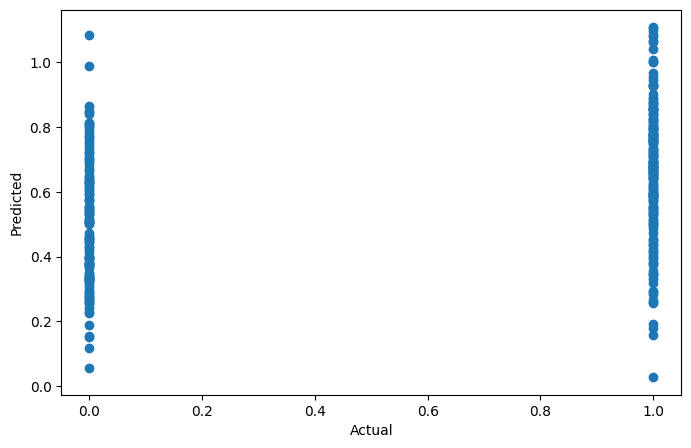

In [16]:
# Plotting the predicted and actual data
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_lr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [17]:
x_test[:10]

,num_keywords,max_avg_key,avg_avg_key,title_tokens,content_tokens,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,min_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,monday,tuesday,wednesday,thursday,friday,weekend,dc_others,dc_lifestyle,dc_entertainment,dc_business,dc_socialmedia,dc_tech
836,5.005356,0.665762,1.698552,9.234773,3.684844,2.120101,0.000000,0.604252,0.000000,145.286628,10.459467,0.000000,1.413779,0.715164,0.046188,0.000000,0.000000,1.026578,0,1,0,0,0,0,1,0,0,0,0,0
993,4.003769,0.665763,1.702832,6.546815,4.341650,0.928809,1.568795,0.000000,0.518780,174.596525,11.004368,39.716044,0.684549,0.504634,0.031905,0.008511,0.312888,1.289652,0,0,0,1,0,0,0,0,0,0,0,1
155,7.008976,0.665763,1.697303,7.447519,4.039280,1.974678,2.121941,0.000000,0.419723,151.537476,9.181206,16.648143,1.413779,0.451636,0.029396,0.012872,0.000000,1.026578,0,0,0,1,0,0,0,0,0,0,0,1
769,3.002370,0.665761,1.697749,7.447519,3.602015,1.508610,2.011929,0.604252,0.000000,195.613401,10.725468,14.267263,0.566246,0.484553,0.022792,0.010292,0.000000,1.026578,1,0,0,0,0,0,0,0,0,1,0,0
438,4.003769,0.665762,1.697192,8.343334,4.305899,1.380070,2.121941,0.604252,0.000000,176.498653,10.449660,15.827708,0.587958,0.424431,0.021360,0.014869,0.000000,1.026578,0,1,0,0,0,0,1,0,0,0,0,0
363,4.003769,0.665761,1.697522,6.546815,3.681383,1.332834,1.741483,0.604252,0.000000,218.201178,10.961358,15.760516,0.657084,0.367200,0.028627,0.011457,0.000000,1.026578,1,0,0,0,0,0,0,0,0,0,0,1
566,6.007099,0.665762,1.698818,5.640576,4.737968,1.247097,2.462754,0.604252,0.000000,195.343007,10.625668,0.000000,0.579508,0.502946,0.037748,0.013467,0.293077,1.184172,0,0,0,1,0,0,0,1,0,0,0,0
556,9.013067,0.665761,1.693786,8.343334,4.443108,0.819677,2.220000,0.604252,0.000000,172.094464,0.000000,17.550915,0.703538,0.449751,0.034049,0.013269,0.256310,1.236872,0,0,1,0,0,0,0,0,0,0,0,1
621,7.008976,0.665762,1.696430,10.122254,4.054410,1.348046,1.568795,0.886524,0.000000,209.360795,0.000000,15.000589,0.568879,0.549744,0.049198,0.000000,0.000000,1.026578,0,0,0,1,0,0,0,0,0,0,1,0
99,6.007099,0.665761,1.690656,9.234773,3.511502,1.099452,2.011929,0.886524,0.000000,189.124959,0.000000,16.391237,0.906131,0.425630,0.038094,0.016005,0.371838,0.404847,0,0,1,0,0,0,1,0,0,0,0,0


In [18]:
preds_lr[:10]

array([[0.27387019],
       [1.09749845],
       [0.70815275],
       [0.42890707],
       [0.34663179],
       [0.61114616],
       [0.57487144],
       [0.72084375],
       [0.85448287],
       [0.11647947]])

In [19]:
# getting prediction intervals for the test data
lower_vet = []
upper_vet = []

for i in preds_lr:
    lower, upper =  get_prediction_interval(i, y_train.values, linear_reg.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [20]:
print(lower_vet[:5])
print(upper_vet[:5])

[-0.5892497704016644, 0.23437848742654, -0.15496721675387404, -0.4342128916823351, -0.516488172030193]
[1.1369901546158583, 1.9606184124440627, 1.5712727082636486, 1.2920270333351875, 1.2097517529873296]


In [21]:
preds_lr.reshape(-1)

array([0.27387019, 1.09749845, 0.70815275, 0.42890707, 0.34663179,
       0.61114616, 0.57487144, 0.72084375, 0.85448287, 0.11647947,
       0.45484749, 0.59457492, 0.29245345, 0.43502931, 0.71132526,
       0.29305595, 0.75096007, 0.6785572 , 0.62938088, 0.39271423,
       0.86988916, 0.79602661, 0.67400485, 0.79541548, 1.04085557,
       0.77419215, 0.66292707, 0.75871688, 0.51812883, 0.43716769,
       0.54648716, 0.50884495, 0.15918596, 0.82324546, 0.29190738,
       0.77732714, 0.88883024, 0.41816258, 0.1793062 , 0.63974964,
       0.79383151, 0.53865242, 0.3801131 , 0.7793101 , 0.77174462,
       0.37892666, 0.54438726, 0.66691874, 0.5026387 , 0.58623555,
       0.77100044, 0.6641637 , 0.44482278, 0.38154139, 0.15138556,
       0.18877379, 0.81984416, 0.72750676, 0.78920598, 0.78245297,
       0.80844839, 0.52779634, 0.5923455 , 0.26375148, 0.67565732,
       0.49798987, 0.26699435, 1.08464994, 0.32661235, 0.28847305,
       0.75303911, 1.06399898, 0.98828565, 0.85483515, 0.96676

In [22]:
df_lr = pd.DataFrame(zip(lower_vet,upper_vet,preds_lr.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_lr.shape)
df_lr.head()

(301, 3)


,lower,upper,mean
0,-0.589250,1.136990,0.273870
1,0.234378,1.960618,1.097498
2,-0.154967,1.571273,0.708153
3,-0.434213,1.292027,0.428907
4,-0.516488,1.209752,0.346632


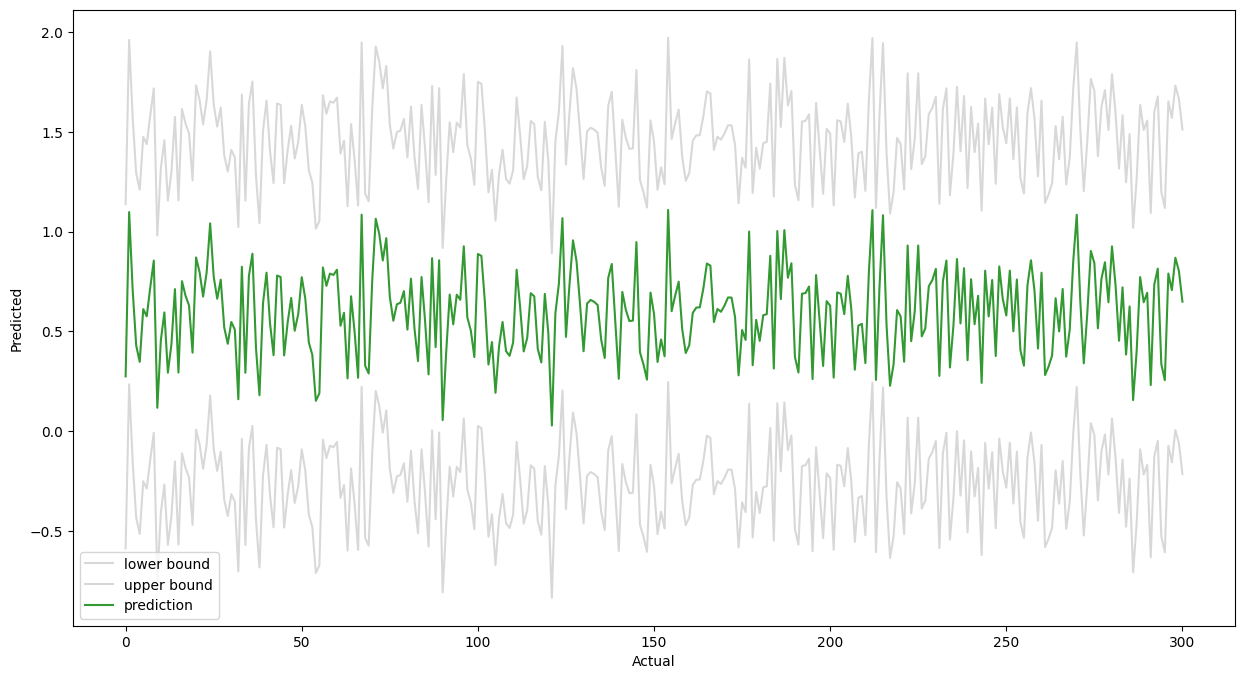

In [23]:
# Plotting the predicted and actual data
plt.figure(figsize=(15,8))
plt.plot(lower_vet,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_vet,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_lr,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

 *2) Ridge Regression: (L2 Regularization)*

In [24]:
# Model training
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)
print("Training R2 score: "+ str(ridge.score(x_train,y_train)))

Training R2 score: 0.15111908183943357


In [25]:
# Predicting on the test and evaluating the accuracy
preds_rid = ridge.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_rid)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_rid)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_rid))))

Test R2 score: 0.07517156990616558
Test MAE: 0.4323037507473083
Test RMSE: 0.47494199806568255


In [26]:
pd.DataFrame(zip(ridge.coef_.T, x_train.columns))

,0,1
0,[0.02378200657926302],num_keywords
1,[4.189096535665653e-05],max_avg_key
2,[0.1570373629989435],avg_avg_key
3,[-0.012100568833324417],title_tokens
4,[0.0960474613882848],content_tokens
5,[-0.0008750978859035002],unique_tokens_rate
6,[0.06220480410341971],num_hrefs
7,[0.04721106496044158],num_imgs
8,[0.08950919049057071],num_videos
9,[-0.0007534021329625299],average_token_length


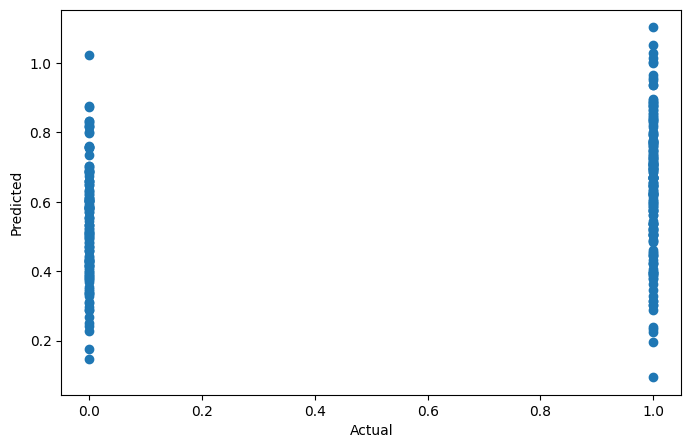

In [27]:
# Plotting the predicted and actual data
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_rid)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [28]:
# getting prediction intervals for the test data
lower_vet = []
upper_vet = []

for i in preds_rid:
    lower, upper =  get_prediction_interval(i, y_train.values, ridge.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [29]:
print(lower_vet[:5])
print(upper_vet[:5])

[-0.5997631620528483, 0.0014150233765068965, -0.009521183148057277, -0.4299503327670986, -0.4983254579171792]
[1.1741045067807354, 1.7752826922100906, 1.7643464856855264, 1.3439173360664851, 1.2755422109164045]


In [30]:
preds_rid.reshape(-1)

array([0.28717067, 0.88834886, 0.87741265, 0.4569835 , 0.38860838,
       0.53770997, 0.54385144, 0.7564726 , 0.71094084, 0.31022921,
       0.66818938, 0.62375986, 0.34200767, 0.56303214, 0.66958952,
       0.31398697, 0.63576834, 0.5751933 , 0.58043135, 0.42380009,
       0.89613834, 0.87715838, 0.67248806, 0.48963142, 1.05153997,
       0.79291649, 0.64509376, 0.72767527, 0.62200125, 0.40702046,
       0.48109731, 0.49990736, 0.32882415, 0.87286671, 0.30327559,
       0.71569697, 0.85406357, 0.50478863, 0.31397179, 0.38089254,
       0.79215408, 0.45551569, 0.39707659, 0.77306101, 0.62392696,
       0.40187276, 0.58110725, 0.62171449, 0.56057951, 0.60329727,
       0.69831147, 0.58888595, 0.50498587, 0.42176272, 0.52481525,
       0.17684181, 0.7230611 , 0.43257461, 0.76973777, 0.79752765,
       0.82717135, 0.36355653, 0.5071501 , 0.4085543 , 0.65285875,
       0.59546603, 0.39660703, 0.95635991, 0.36743386, 0.37598644,
       0.77686847, 0.76116019, 0.68677644, 0.86338861, 0.70634

In [31]:
df_rid = pd.DataFrame(zip(lower_vet,upper_vet,preds_rid.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_rid.shape)
df_rid.head()

(301, 3)


,lower,upper,mean
0,-0.599763,1.174105,0.287171
1,0.001415,1.775283,0.888349
2,-0.009521,1.764346,0.877413
3,-0.429950,1.343917,0.456984
4,-0.498325,1.275542,0.388608


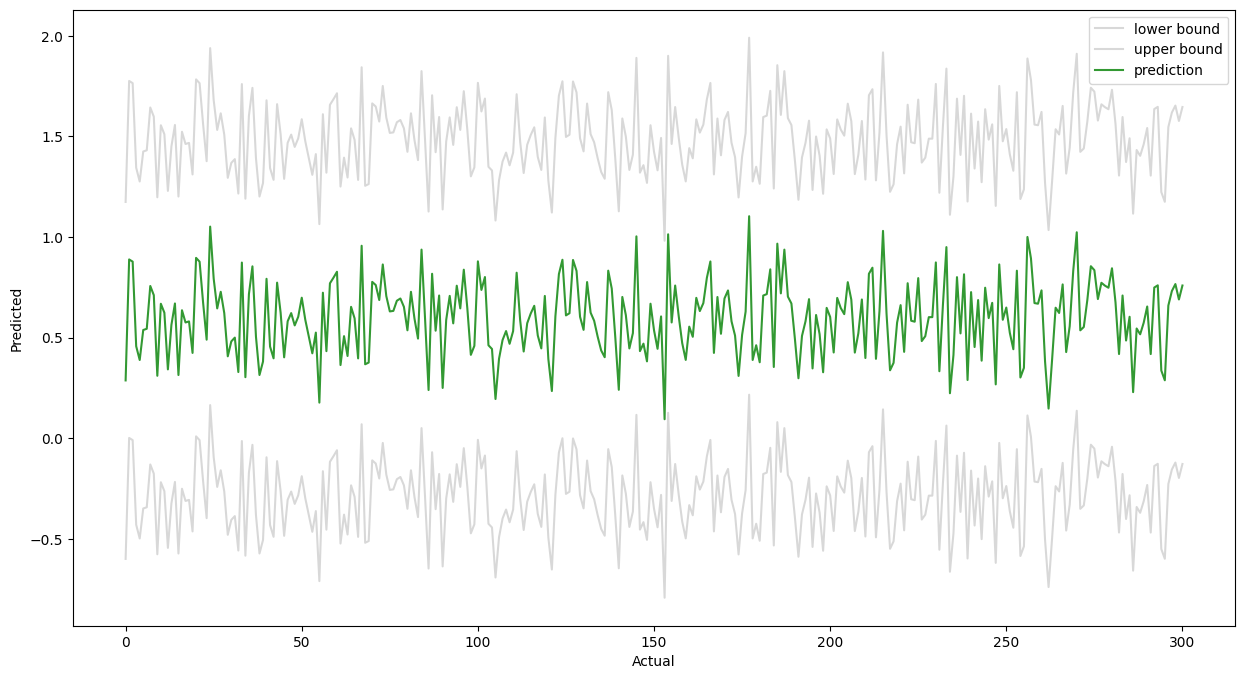

In [32]:
# Plotting the predicted and actual data
plt.figure(figsize=(15,8))
plt.plot(lower_vet,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_vet,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_rid,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()

*3) Ensemble*

In [43]:
# Model training
from sklearn.ensemble import VotingRegressor

estimators = [('lr',linear_reg),('rid',ridge),('lasso',las)]
voting_ensemble = VotingRegressor(estimators,)
voting_ensemble.fit(x_train,y_train)
print("Training R2 score: "+ str(voting_ensemble.score(x_train,y_train)))

Training R2 score: 0.15866482141458682


In [44]:
# Predicting on the test and evaluating the accuracy
preds_vote = voting_ensemble.predict(x_test)

print("Test R2 score: "+ str(metrics.r2_score(y_test,preds_vote)))
print("Test MAE: "+ str(metrics.mean_absolute_error(y_test,preds_vote)))
print("Test RMSE: "+ str(np.sqrt(metrics.mean_squared_error(y_test,preds_vote))))

Test R2 score: 0.11011594977227301
Test MAE: 0.440455508816965
Test RMSE: 0.46588282517116353


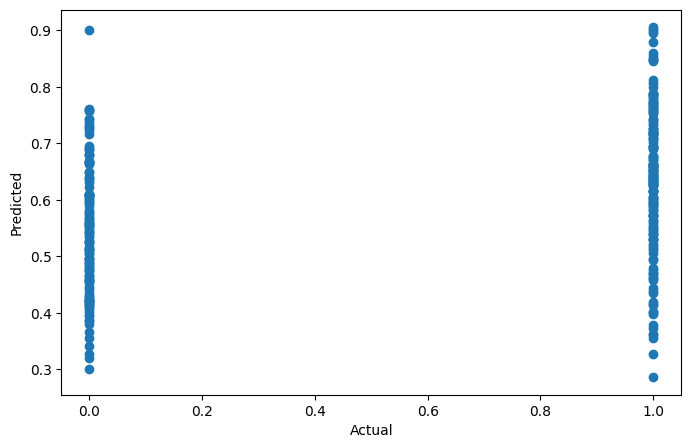

In [45]:
# Plotting the predicted and actual data
plt.figure(figsize=(8,5))
plt.scatter(y_test,preds_vote)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [46]:
# getting prediction intervals for the test data
lower_vet = []
upper_vet = []

for i in preds_vote.reshape(-1,1):
    lower, upper =  get_prediction_interval(i, y_train.values, voting_ensemble.predict(x_train).reshape(-1,1))
    lower_vet.append(lower)
    upper_vet.append(upper)

In [48]:
preds_vote.reshape(-1)

array([0.38549415, 0.86042963, 0.72700233, 0.49377739, 0.44356059,
       0.58143257, 0.57138816, 0.69091932, 0.72028844, 0.34071676,
       0.57282615, 0.60459213, 0.40996757, 0.53116768, 0.65878546,
       0.40082817, 0.66072334, 0.61639736, 0.60175128, 0.47065197,
       0.78715637, 0.75620886, 0.6473115 , 0.6268295 , 0.89594571,
       0.72085008, 0.63448748, 0.69394458, 0.57852389, 0.47987658,
       0.54100869, 0.5347313 , 0.36115057, 0.76385125, 0.39687486,
       0.69615524, 0.77944513, 0.50613094, 0.36290653, 0.53869459,
       0.72714239, 0.5298699 , 0.45754376, 0.71593757, 0.66370439,
       0.45874701, 0.57364537, 0.62802494, 0.5528866 , 0.59499147,
       0.68825117, 0.61616375, 0.51508342, 0.46624857, 0.4238808 ,
       0.3203524 , 0.71278228, 0.58517432, 0.71812845, 0.72514074,
       0.74368711, 0.49559815, 0.56497907, 0.42258246, 0.64131922,
       0.56296583, 0.41968099, 0.87881715, 0.42982927, 0.41996703,
       0.70844972, 0.80686692, 0.75683456, 0.77122178, 0.75618

In [49]:
df_vote = pd.DataFrame(zip(lower_vet,upper_vet,preds_vote.reshape(-1).tolist()),columns=['lower','upper','mean'])
print(df_vote.shape)
df_vote.head()

(301, 3)


,lower,upper,mean
0,-0.497489,1.268477,0.385494
1,-0.022553,1.743413,0.860430
2,-0.155981,1.609985,0.727002
3,-0.389206,1.376760,0.493777
4,-0.439422,1.326544,0.443561


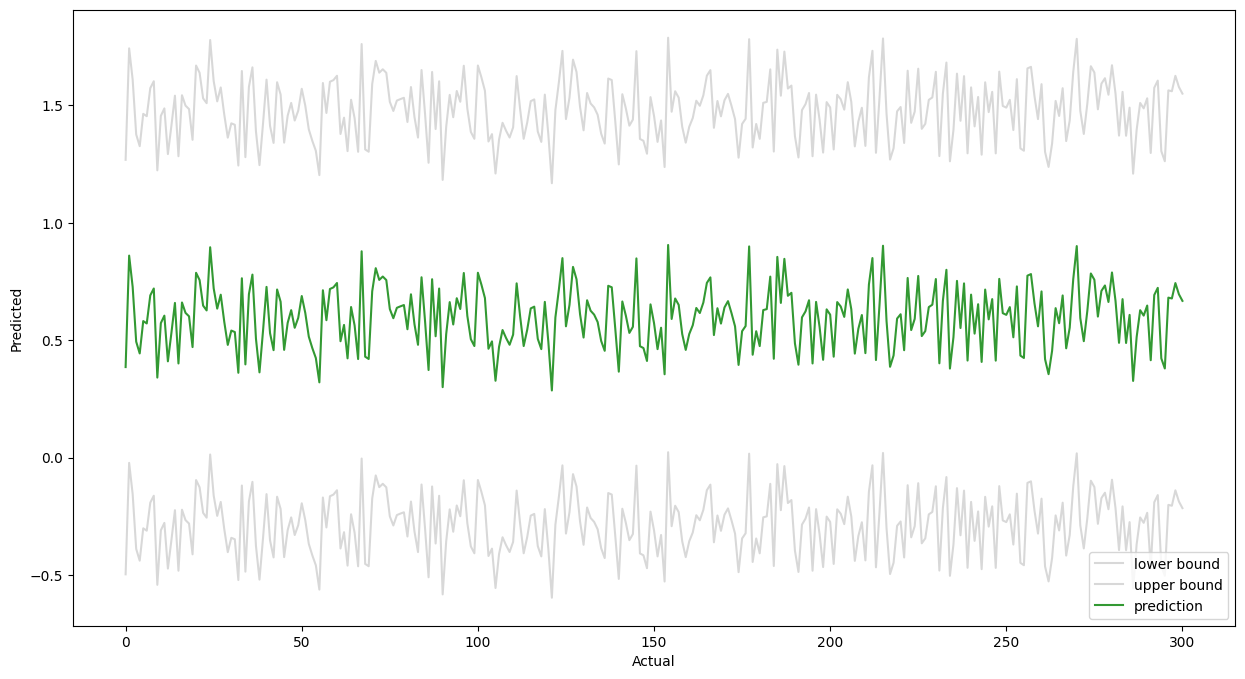

In [50]:
# Plotting the predicted and actual data
plt.figure(figsize=(15,8))
plt.plot(lower_vet,label='lower bound',alpha=0.3,color='grey')
plt.plot(upper_vet,label='upper bound',alpha=0.3,color='grey')
plt.plot(preds_vote,label='prediction',alpha=0.8,color='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()